In [3]:
#Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # ['r', 'python'] -> [r, python]

In [4]:
# Only data analyst roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."


In [5]:
# Listed the job counts based on country name
df_DA_country = df_DA['job_country'].value_counts().to_frame().head(20)

In [6]:
# We need to get first 20 countries + Turkey
df_DA_country = df_DA_country[1:20]

In [7]:
df_DA_TR = df_DA[df_DA['job_country'] == 'Turkey'].value_counts('job_country').to_frame()

In [8]:
df_DA_country = pd.concat([df_DA_country, df_DA_TR])
df_DA_country

,count
job_country,
France,13803
United Kingdom,10482
Germany,7131
Singapore,6632
India,6121
Spain,5177
Philippines,4766
Italy,4543
Netherlands,4123


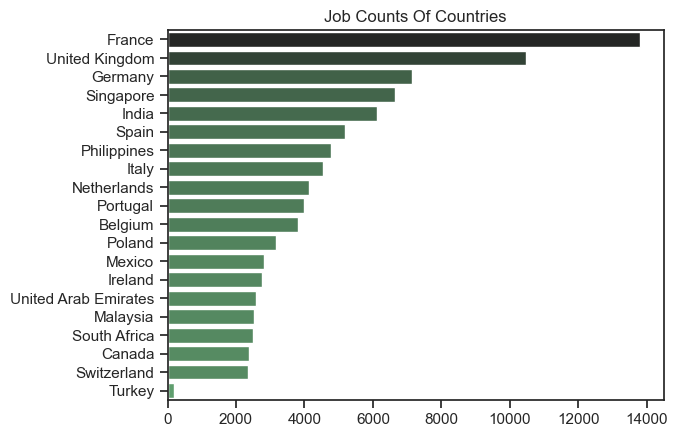

In [9]:
# Create a graph with seaborn
sns.set_theme(style='ticks')
sns.barplot(data=df_DA_country, x='count', y='job_country', hue='count', palette='dark:g_r', legend=False)
plt.title('Job Counts Of Countries')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [10]:
# Get the country names for further analysis
list_of_countries = df_DA_country.index.to_list()

# Because of the currency deficit, need to remove some of the countries 
list_to_remove = ['Singapore', 'India', 'Philippines', 'Turkey','Mexico', 'United Arab Emirates', 'Malaysia', 'South Africa', 'Canada']
for i in range(len(list_to_remove)):
    list_of_countries.remove(list_to_remove[i])

list_of_countries

['France',
 'United Kingdom',
 'Germany',
 'Spain',
 'Italy',
 'Netherlands',
 'Portugal',
 'Belgium',
 'Poland',
 'Ireland',
 'Switzerland']

# What are the salary range between selected countries ? 

In [16]:
# Get the countries that have same currency
df_DA_country = df_DA[df_DA['job_country'].isin(list_of_countries)]

In [17]:
# Drop the values that have Nan values in salary_year_avg
df_DA_selected = df_DA_country.dropna(subset='salary_year_avg')
df_DA_selected.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,"[gdpr, sap, powerpoint, excel]","{'analyst_tools': ['sap', 'powerpoint', 'excel..."
1555,Data Analyst,Data Analyst/Engineer (M/F/D),"Aveiro, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-04-25 13:27:25,False,False,Portugal,year,111175.0,NaN,Bosch Group,"[databricks, spark]","{'cloud': ['databricks'], 'libraries': ['spark']}"
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"


In [19]:
df_DA_selected_salary = df_DA_selected.groupby('job_country')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_selected_salary

,count,median
job_country,,
Germany,48,103750.00
Ireland,19,98500.00
Netherlands,20,93852.00
Spain,30,91977.00
Poland,43,89100.00
Portugal,37,89100.00
United Kingdom,72,87750.00
Belgium,20,77958.75
France,50,69175.00


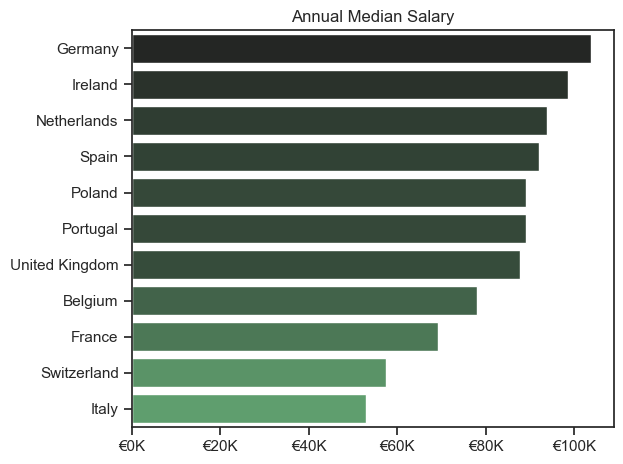

In [29]:
sns.set_theme(style='ticks')
sns.barplot(data=df_DA_selected_salary, x='median', y='job_country', hue='median', palette='dark:g_r')
plt.title('Annual Median Salary')
plt.ylabel('')
plt.xlabel('')
plt.legend().remove()

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'€{int(x/1000)}K'))

plt.tight_layout()

/var/folders/73/n1fgp9kj4190smcl0_0_ccr00000gn/T/ipykernel_8600/1800577171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


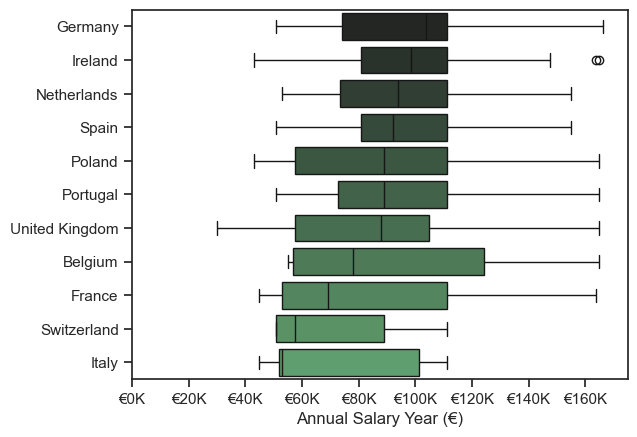

In [25]:
# Plot the sorted boxplot
sns.set_theme(style='ticks')
sns.boxplot(
    data=df_DA_country.dropna(subset='salary_year_avg'),
    x='salary_year_avg',
    y='job_country',
    palette='dark:g',
    order=df_DA_selected_salary.index  # Sort countries by median salary
)

# Set axis formatting and labels
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'€{int(x/1000)}K'))
plt.xlabel('Annual Salary Year (€)')
plt.ylabel('')
plt.xlim(0, 175000)

# Display the plot
plt.show()

In [15]:
df_DA_TR_salary = df_DA[df_DA['job_country'] == 'Turkey'].dropna(subset='salary_year_avg')
df_DA_TR_salary[['job_title', 'company_name', 'salary_year_avg','job_posted_date']]

,job_title,company_name,salary_year_avg,job_posted_date
32311,Data Warehouse Analyst,Robert Half,110000.0,2023-02-02 13:16:23
265598,Data Architect (optional relocation to Montene...,Libertex Group,163782.0,2023-06-07 08:48:08
417014,Data Analyst,Ace Games,57500.0,2023-07-05 16:30:39
543894,Product Data Analyst,Fugo Games,57600.0,2023-11-17 19:22:56
562045,Product Data Analyst,Fugo Games,50400.0,2023-04-06 04:23:55
